In [17]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [18]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

np.random.seed(10)
pd.set_option('display.precision', 2)

In [19]:
df = pd.read_csv('C:/Users/Инна/Desktop/otus/AB_NYC_2019.csv')

In [4]:
df.shape

(48895, 16)

In [5]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
for col in df.columns:
    if not 'no' in col and not 'ID' in col:
        un_n = df[col].nunique()
        print(f'no of unique {col}: {un_n}')

no of unique id: 48895
no of unique name: 47905
no of unique host_id: 37457
no of unique host_name: 11452
no of unique neighbourhood_group: 5
no of unique neighbourhood: 221
no of unique latitude: 19048
no of unique longitude: 14718
no of unique room_type: 3
no of unique price: 674
no of unique minimum_nights: 109
no of unique number_of_reviews: 394
no of unique last_review: 1764
no of unique reviews_per_month: 937
no of unique calculated_host_listings_count: 47
no of unique availability_365: 366


In [8]:
df.isna().any()#проверка пропущенных значений - сделать что-то с пропусками

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [9]:
#удалим ненужные данные

df_filtered = df.copy()

# Список столбцов для удаления (добавьте все нужные)
columns_to_drop = [
    col for col in df_filtered.columns 
    if any(term in col for term in [
        'id',
        'name',
        'host_id',
        'host_name',
        'last_review'
    ])
]
# Удаляем выбранные столбцы
df_filtered = df_filtered.drop(columns=columns_to_drop)

print(f'''
Удалены столбцы:
{columns_to_drop}
''')
print(f'''
Оставшиеся столбцы:
{df_filtered.columns.tolist()}
''')

df_filtered.head(3)


Удалены столбцы:
['id', 'name', 'host_id', 'host_name', 'last_review']


Оставшиеся столбцы:
['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']



,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,1,365


In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.89e+04,4.89e+04,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00
mean,1.90e+07,6.76e+07,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,1.10e+07,7.86e+07,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,2.54e+03,2.44e+03,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,9.47e+06,7.82e+06,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,1.97e+07,3.08e+07,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,2.92e+07,1.07e+08,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,3.65e+07,2.74e+08,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


In [11]:
corr = df_filtered.select_dtypes(include=['number']).corr()

In [12]:
corr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.00,0.08,0.03,0.02,-0.02,-1.01e-02,1.95e-02,-0.01
longitude,0.08,1.00,-0.15,-0.06,0.06,1.46e-01,-1.15e-01,0.08
price,0.03,-0.15,1.00,0.04,-0.05,-3.06e-02,5.75e-02,0.08
minimum_nights,0.02,-0.06,0.04,1.00,-0.08,-1.22e-01,1.28e-01,0.14
number_of_reviews,-0.02,0.06,-0.05,-0.08,1.00,5.50e-01,-7.24e-02,0.17
reviews_per_month,-0.01,0.15,-0.03,-0.12,0.55,1.00e+00,-9.42e-03,0.19
calculated_host_listings_count,0.02,-0.11,0.06,0.13,-0.07,-9.42e-03,1.00e+00,0.23
availability_365,-0.01,0.08,0.08,0.14,0.17,1.86e-01,2.26e-01,1.00


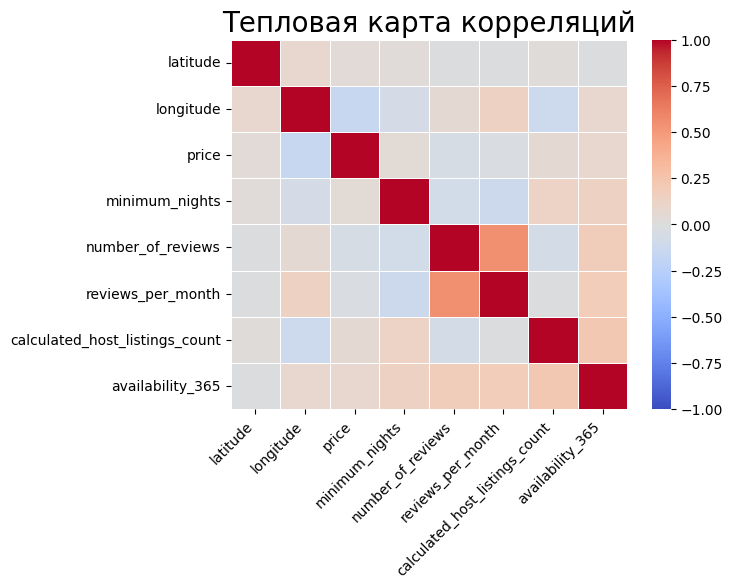

In [13]:
# Рисуем тепловую карту для корреляций

sns.heatmap(
    corr,
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='white',
    vmin=-1,
    vmax=1
)
plt.title('Тепловая карта корреляций', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()

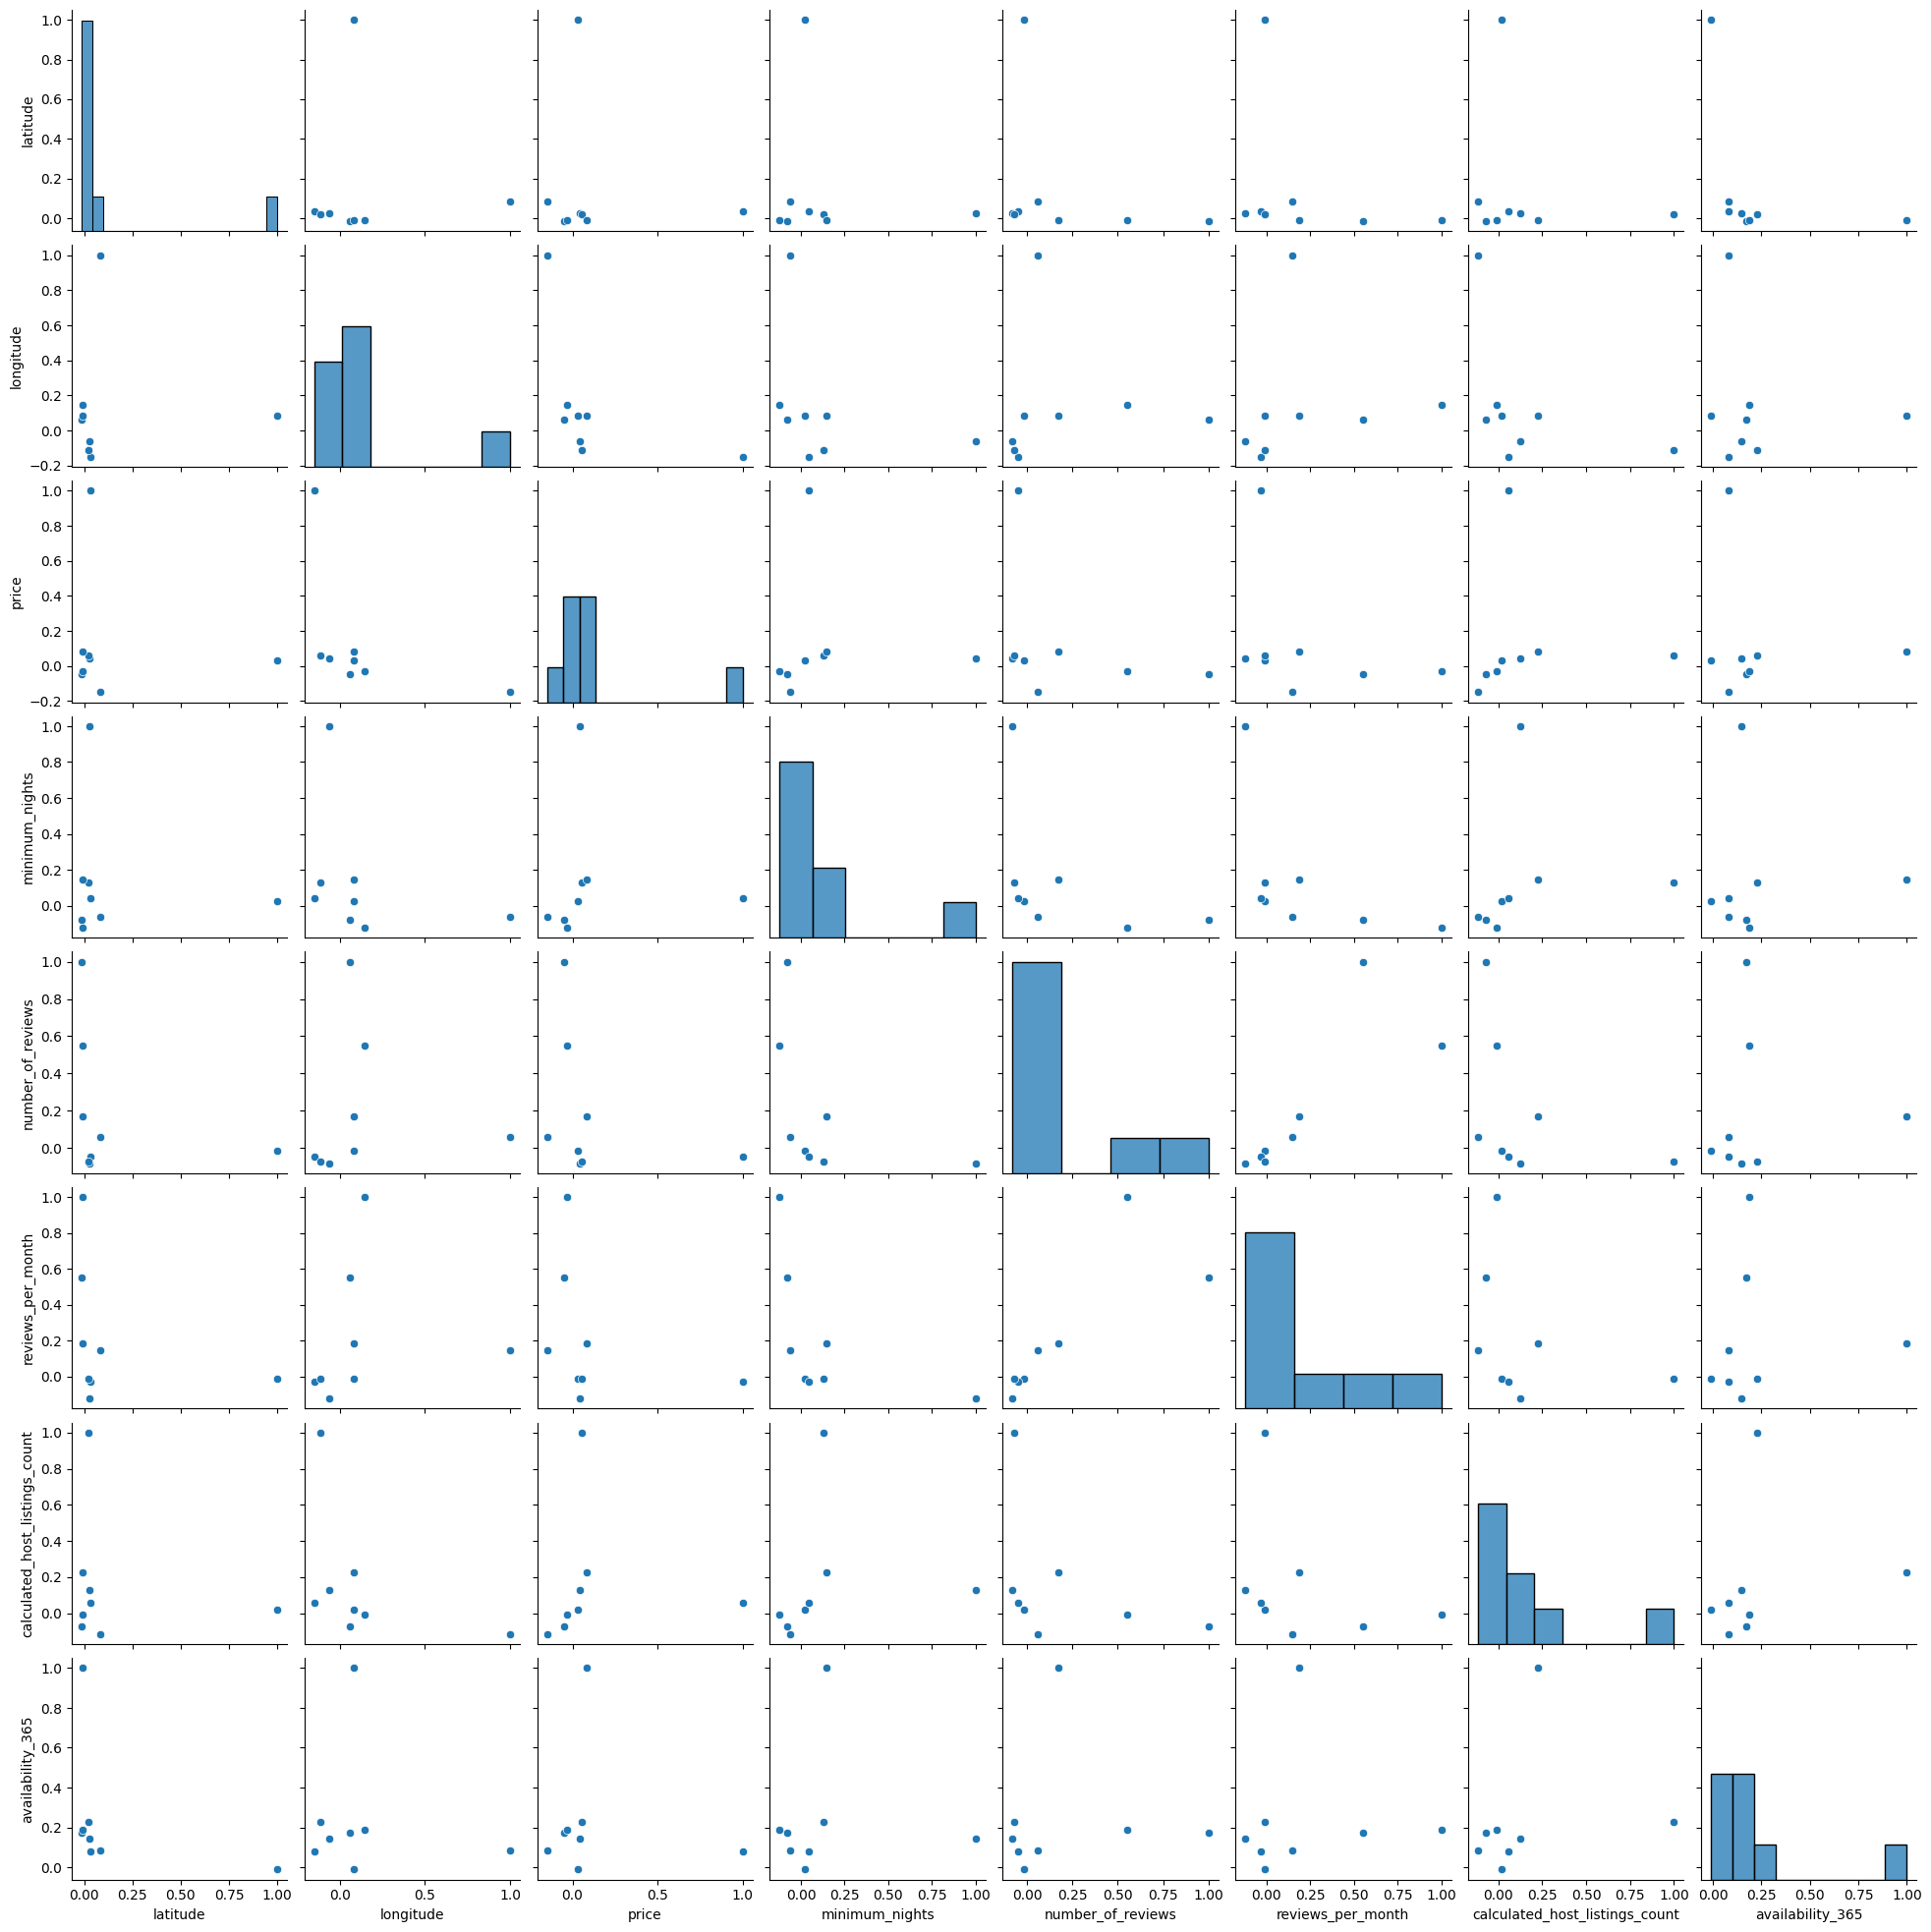

In [14]:
#построить после того как преобразую категориальные признаки
sns.pairplot(corr)
plt.show()

In [ ]:
# Группировка по категориям и вычисление общей прибыли
# profit_by_category = df.groupby('longitude')['price'].sum().reset_index()

# Построение столбчатой диаграммы (bar plot)
# plt.figure(figsize=(10, 6))
sns.barplot(x='longitude', y='price', data=df)

plt.title('Прибыль по категориям')
plt.xlabel('Категория')
plt.ylabel('Прибыль')
plt.xticks(rotation=45, ha='right') # Поворачиваем метки X для читаемости
plt.tight_layout()
plt.show()